# Documentation of the Sequential Parameter Optimization

* This document describes the `Spot` features.

## Example: spot

In [1]:
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

### The Objective Function

* The `spotPython` package provides several classes of objective functions.
* We will use an analytical objective function, i.e., a function that can be described by a (closed) formula:
   $$f(x) = x^2$$

In [2]:
fun = analytical().fun_sphere

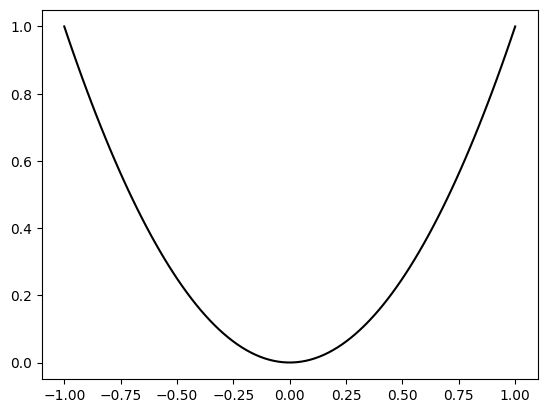

In [3]:
x = np.linspace(-1,1,100).reshape(-1,1)
y = fun(x)
plt.figure()
plt.plot(x,y, "k")
plt.show()

In [4]:
spot_1 = spot.Spot(fun=fun,
                   lower = np.array([-10]),
                   upper = np.array([100]),
                   fun_evals = 7,
                   fun_repeats = 1,
                   max_time = inf,
                   noise = False,
                   tolerance_x = np.sqrt(np.spacing(1)),
                   var_type=["num"],
                   infill_criterion = "y",
                   n_points = 1,
                   seed=123,
                   log_level = 50,
                   show_models=True,
                   fun_control = {},
                   design_control={"init_size": 5,
                                   "repeats": 1},
                   surrogate_control={"noise": False,
                                      "cod_type": "norm",
                                      "min_theta": -4,
                                      "max_theta": 3,
                                      "n_theta": 1,
                                      "model_optimizer": differential_evolution,
                                      "model_fun_evals": 1000,
                                      })

* `spot`'s  `__init__` method sets the control parameters. There are two parameter groups:

1. external parameters can be specified by the user
2. internal parameters, which are handled by `spot`.


### External Parameters

|external parameter| type | description | default | mandatory |
| -- | -- | -- |-- |-- |
| `fun` | object |objective function | | yes |
| `lower` | array | lower bound | | yes |
| `upper` | array | upper bound | | yes |
| `fun_evals`| int | number of function evaluations | 15 | no |
| `fun_evals`| int | number of function evaluations | 15 | no |
| `fun_control` | dict | noise etc. | {} | n |
| `max_time` | int | max run time budget | `inf` | no |
| `noise`| bool | if repeated evaluations of `fun` results in different values, then `noise` should be set to `True`. | `False`| no|
| `tolerance_x`| float | tolerance for new x solutions. Minimum distance of new solutions, generated by `suggest_new_X`, to already existing solutions. If zero (which is the default), every new solution is accepted. | `0` | no|
| `var_type` | list | list of type information, can be either `"num"` or `"factor"` | `["num"]` | no |
| `infill_criterion`| string | Can be `"y"`, `"s"`, `"ei"` (negative expected improvement), or `"all"`| `"y"` | no|
| `n_points`| int | number of infill points | 1 | no |
| `seed` | int | initial seed. If `Spot.run()` is called twice, different results will be generated. To reproduce results, the `seed` can be used. | `123` | no |
| `log_level`| int | log level with the following settings: `NOTSET` (`0`), `DEBUG` (`10`: Detailed information, typically of interest only when diagnosing problems.), `INFO` (`20`: Confirmation that things are working as expected.), `WARNING` (`30`: An indication that something unexpected happened, or indicative of some problem in the near future (e.g. ‘disk space low’). The software is still working as expected.), `ERROR` (`40`: Due to a more serious problem, the software has not been able to perform some function.), and `CRITICAL` (`50`: A serious error, indicating that the program itself may be unable to continue running.)| `50` | no |
| `show_models` | bool | Plot model. Currently only 1-dim functions are supported | `False` | no|
| `design`| object | experimental design | `None` | no |
| `design_control` | dict | control parameters | see below | no|
| `surrogate` | | surrogate model | `kriging` | no |
| `surrogate_control` | dict | control parameters | see below | no|
| `optimizer` | object | optimizer | see below | no|
| `optimizer_control` | dict | control parameters | see below | no|

* Besides these single parameters, the following parameter dictionaries can be specified by the user:
  * `fun_control`
  * `design_control`
  * `surrogate_control`
  * `optimizer_control`

## The `fun_control` Dictionary

|external parameter| type | description | default | mandatory |
| -- | -- | -- |-- |-- |
| `sigma` | float | noise: standard deviation | `0` | yes |
| `seed` | int | seed for rng | `124` | yes |


## The `design_control` Dictionary

|external parameter| type | description | default | mandatory |
| -- | -- | -- |-- |-- |
| `init_size` | int | initial sample size | `10` | yes |
| `repeats` | int | number of repeats of the initial sammples | `1` | yes |


## The `surrogate_control` Dictionary

|external parameter| type | description | default | mandatory |
| -- | -- | -- |-- |-- |
| `noise`
| `model_optimizer` | object | optimizer | `differential_evolution` | no |
| `model_fun_evals` | | | | |
| `min_theta` | | | `-3.`| |
| `max_theta` | | | `3.` | |
| `n_theta`   | | | `1` | |
| `n_p`       | | | `1` | | 
| `optim_p`   | | | `False` | |
| `cod_type`  | | | `"norm"` | |
| `var_type`  | | | | |
| `use_cod_y` | bool | |`False`| |

## The `optimizer_control` Dictionary

|external parameter| type | description | default | mandatory |
| -- | -- | -- |-- |-- |
| `max_iter` | int | max number of iterations. Note: these are the cheap evaluations on the surrogate. | `1000` | no |

## Run

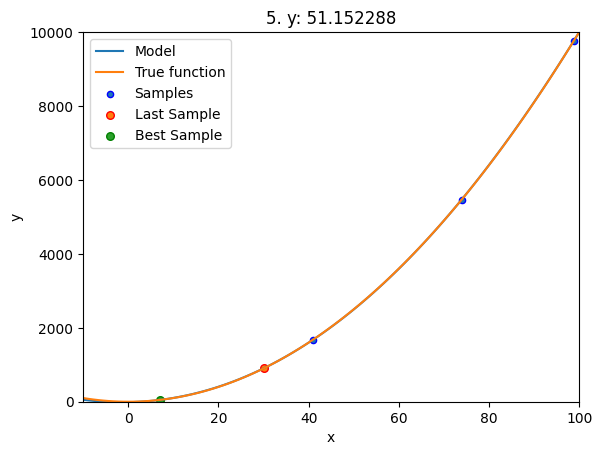

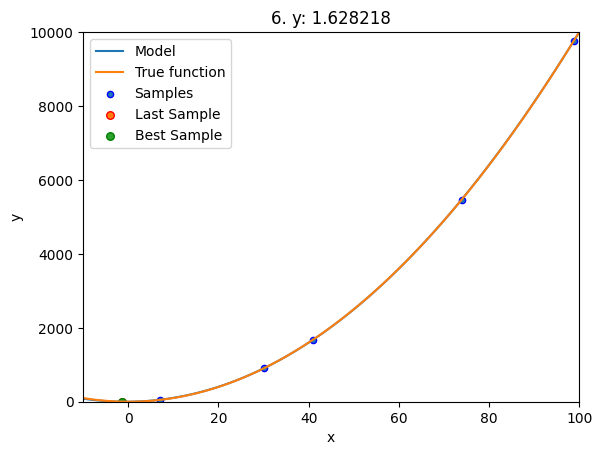

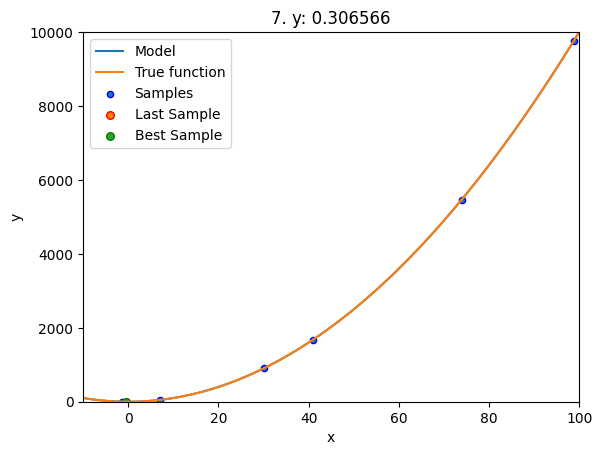

In [5]:
spot_1.run()

## Print the Results

In [6]:
spot_1.print_results()

min y: 0.30656551286610595
x0: -0.5536835855126157


[['x0', -0.5536835855126157]]

## Show the Progress

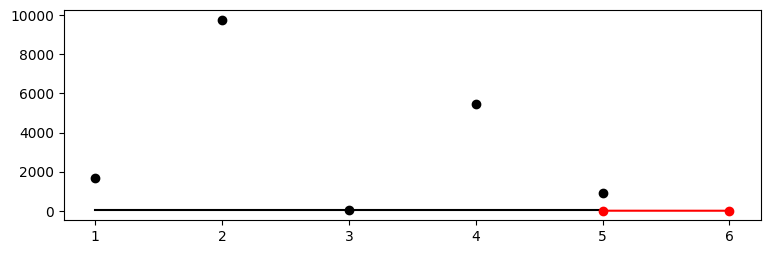

In [7]:
spot_1.plot_progress()

## Visualize the Surrogate

* The plot method of the `kriging` surrogate is used.
* Note: the plot uses the interval defined by the ranges of the natural variables.

<Figure size 900x600 with 0 Axes>

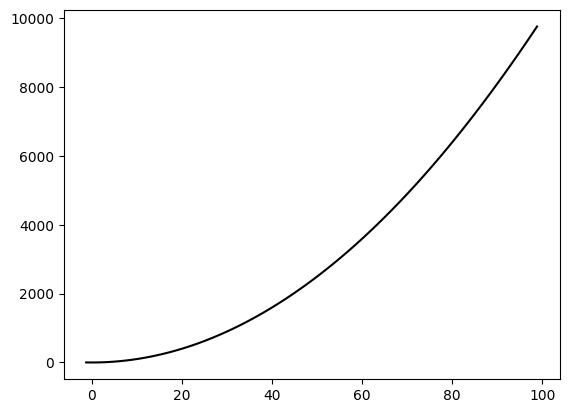

In [8]:
spot_1.surrogate.plot()

## 1. Init: Build Initial Design

In [9]:
from spotPython.design.spacefilling import spacefilling
from spotPython.build.kriging import Kriging
from spotPython.fun.objectivefunctions import analytical
gen = spacefilling(2)
rng = np.random.RandomState(1)
lower = np.array([-5,-0])
upper = np.array([10,15])
fun = analytical().fun_branin
fun_control = {"sigma": 0,
               "seed": 123}

X = gen.scipy_lhd(10, lower=lower, upper = upper)
print(X)
y = fun(X, fun_control=fun_control)
print(y)

[[ 8.97647221 13.41926847]
 [ 0.66946019  1.22344228]
 [ 5.23614115 13.78185824]
 [ 5.6149825  11.5851384 ]
 [-1.72963184  1.66516096]
 [-4.26945568  7.1325531 ]
 [ 1.26363761 10.17935555]
 [ 2.88779942  8.05508969]
 [-3.39111089  4.15213772]
 [ 7.30131231  5.22275244]]
[128.95676449  31.73474356 172.89678121 126.71295908  64.34349975
  70.16178611  48.71407916  31.77322887  76.91788181  30.69410529]


## Replicability

* Seed

In [10]:
gen = spacefilling(2, seed=123)
X0 = gen.scipy_lhd(3)
gen = spacefilling(2, seed=345)
X1 = gen.scipy_lhd(3)
X2 = gen.scipy_lhd(3)
gen = spacefilling(2, seed=123)
X3 = gen.scipy_lhd(3)
X0, X1, X2, X3

(array([[0.77254938, 0.31539299],
        [0.59321338, 0.93854273],
        [0.27469803, 0.3959685 ]]),
 array([[0.78373509, 0.86811887],
        [0.06692621, 0.6058029 ],
        [0.41374778, 0.00525456]]),
 array([[0.121357  , 0.69043832],
        [0.41906219, 0.32838498],
        [0.86742658, 0.52910374]]),
 array([[0.77254938, 0.31539299],
        [0.59321338, 0.93854273],
        [0.27469803, 0.3959685 ]]))

## Surrogates

### A Simple Predictor

The code below shows how to use a simple model for prediction.

* Assume that only two (very costly) measurements are available:
  
  1. f(0) = 0.5
  2. f(2) = 2.5

* We are interested in the value at $x_0 = 1$, i.e., $f(x_0 = 1)$, but cannot run an additional, third experiment.

In [11]:
from sklearn import linear_model
X = np.array([[0], [2]])
y = np.array([0.5, 2.5])
S_lm = linear_model.LinearRegression()
S_lm = S_lm.fit(X, y)
X0 = np.array([[1]])
y0 = S_lm.predict(X0)
print(y0)


[1.5]


* Central Idea:
  * Evaluation of the surrogate model `S_lm` is much cheaper (or / and much faster) than running the real-world experiment $f$.

## Demo/Test: Objective Function Fails

* SPOT expects `np.nan` values from failed objective function values.
* These are handled.
* Note: SPOT's counter considers only successful executions of the objective function.

In [12]:
import numpy as np
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
import numpy as np
from math import inf
# number of initial points:
ni = 20
# number of points
n = 30

fun = analytical().fun_random_error
lower = np.array([-1])
upper = np.array([1])
design_control={"init_size": ni}

spot_1 = spot.Spot(fun=fun,
            lower = lower,
            upper= upper,
            fun_evals = n,
            show_progress=False,
            design_control=design_control,)
spot_1.run()
# To check whether the run was successfully completed,
# we compare the number of evaluated points to the specified
# number of points.
assert spot_1.y.shape[0] == n


[ 0.53176481 -0.9053821  -0.02203599 -0.21843718  0.78240941 -0.58120945
         nan  0.67234256  0.31802454 -0.68898927 -0.75129705  0.97550354
  0.41757584  0.0786237          nan  0.23700598 -0.49274073 -0.82319082
 -0.17991251  0.1481835 ]
[-1.]
[0.95541987]
[0.17335968]
[-0.58552368]
[-0.20126111]
[-0.60100809]
[-0.97897336]
[nan]
[-0.2748985]
[0.8359486]
[0.99035591]
[0.01641232]
[0.5629346]


# Tests and Experiments

In [13]:
def one_hot_encode(strings):
    # unique_strings = sorted(set(strings))
    n = len(strings)
    encoding_dict = {}
    for i, string in enumerate(strings):
        one_hot_encoded_value = [0] * n
        one_hot_encoded_value[i] = 1
        encoding_dict[string] = one_hot_encoded_value
    return encoding_dict

In [14]:
res_dict = one_hot_encode(["gini", "info_gain", "hellinger"])
res_dict

{'gini': [1, 0, 0], 'info_gain': [0, 1, 0], 'hellinger': [0, 0, 1]}

In [15]:
def sum_encoded_values_2(strings, encoding_dict):
    result = [0] * len(list(encoding_dict.values())[0])
    for string in strings:
        encoded_value = encoding_dict.get(string)
        if encoded_value:
            result = [sum(x) for x in zip(result, encoded_value)]
    return result

In [16]:
sum_encoded_values_2(["a", "b"], res_dict)

[0, 0, 0]

In [17]:
def sum_encoded_values(strings, encoding_dict):
    result = [0] * len(list(encoding_dict.values())[0])
    for string in strings:
        encoded_value = encoding_dict.get(string)
        if encoded_value:
            result = [sum(x) for x in zip(result, encoded_value)]
    decimal_result = 0
    for i, value in enumerate(result[::-1]):
        decimal_result += value * (2 ** i)
    return decimal_result

In [18]:
sum_encoded_values(["a", "b"], res_dict)

0

In [19]:
def find_closest_key(integer_value, encoding_dict):
    binary_value = [int(x) for x in format(integer_value, f'0{len(list(encoding_dict.values())[0])}b')]
    min_distance = float('inf')
    closest_key = None
    for key, encoded_value in encoding_dict.items():
        distance = sum([x != y for x, y in zip(binary_value, encoded_value)])
        if distance < min_distance:
            min_distance = distance
            closest_key = key
    return closest_key

In [20]:
res = find_closest_key(3, res_dict)
res

'info_gain'

In [21]:
sum_encoded_values(res, res_dict)

0

In [22]:
from spotPython.utils.convert import class_for_name
shgo_class = class_for_name("scipy.optimize", "shgo")

In [23]:
import numpy as np
from scipy.optimize import rosen
bounds = [(0,2), (0, 2), (0, 2), (0, 2), (0, 2)]
shgo_class(rosen, bounds)

 message: Optimization terminated successfully.
 success: True
     fun: 2.920392374190081e-18
    funl: [ 2.920e-18]
       x: [ 1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00]
      xl: [[ 1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00]]
     nit: 2
    nfev: 50
   nlfev: 17
   nljev: 1
   nlhev: 0

# Tests

In [24]:
from spotPython.fun.objectivefunctions import analytical
from spotPython.design.factorial import factorial
from spotPython.build.kriging import Kriging
import numpy as np

gen = factorial(3)
rng = np.random.RandomState(1)
lower = np.array([-1,-1])
upper = np.array([0,0])
fun = analytical().fun_linear
X = gen.full_factorial(3)
X = 10*X
y = fun(X)

S = Kriging(name='kriging',  seed=123)
S.fit(X,y)
X2 = 2*X

Y = np.empty_like(X2)
T = np.empty_like(X2)
for i in range(S.n):
    T[i] = S.nat_to_cod_x(X2[i])
    Y[i] = S.cod_to_nat_x(T[i])

In [25]:
def fit(self, nat_X, nat_y):
    self.nat_X = copy.deepcopy(nat_X)
    self.nat_y = copy.deepcopy(nat_y)
    self.n = self.nat_X.shape[0]
    self.k = self.nat_X.shape[1]
    self.cod_X = empty_like(self.nat_X)
    self.cod_y = empty_like(self.nat_y)
    if len(self.var_type) < self.k:
        self.var_type = self.var_type * self.k
        logger.warning("Warning: All variable types forced to 'num'.")
    self.num_mask = array(list(map(lambda x: x == "num", self.var_type)))
    self.factor_mask = array(list(map(lambda x: x == "factor", self.var_type)))
    self.int_mask = array(list(map(lambda x: x == "int", self.var_type)))
    self.ordered_mask = array(list(map(lambda x: x == "int" or x == "num" or x == "float", self.var_type)))
    self.nat_to_cod_init()
    if self.n_theta > self.k:
        self.n_theta = self.k
        logger.warning("More theta values than dimensions. `n_theta` set to `k`.")
    self.theta = zeros(self.n_theta)
    self.x0_theta = ones((self.n_theta,)) * self.n / (100 * self.k)
    self.p = ones(self.n_p) * 2.0
    self.pen_val = self.n * log(var(self.nat_y)) + 1e4
    self.negLnLike = None
    self.gen = spacefilling(k=self.k, seed=self.seed)
    self.LnDetPsi = None
    self.Psi = zeros((self.n, self.n), dtype=float64)
    self.psi = zeros((self.n, 1))
    self.one = ones(self.n)
    self.mu = None
    self.U = None
    self.SigmaSqr = None
    self.Lambda = None
    self.set_de_bounds()
    new_theta_p_Lambda = self.optimize_model()
    self.extract_from_bounds(new_theta_p_Lambda)
    self.build_Psi()
    self.build_U()
    self.likelihood()
    self.update_log()

## Test return_conf_list_from_var_dict

In [26]:
import numpy as np
from spotPython.hyperparameters.values import (
    return_conf_list_from_var_dict,
    add_core_model_to_fun_control,
    get_var_name,
    get_var_type,
    assign_values,
)
from river.tree import HoeffdingAdaptiveTreeRegressor
from spotRiver.data.river_hyper_dict import RiverHyperDict

fun_control = {}
core_model  = HoeffdingAdaptiveTreeRegressor
fun_control = add_core_model_to_fun_control(core_model=core_model,
                              fun_control=fun_control,
                              hyper_dict=RiverHyperDict,
                              filename=None)
var_type = get_var_type(fun_control)
var_name = get_var_name(fun_control)
fun_control.update({"var_type": var_type,
                    "var_name": var_name})

In [27]:

X = np.array([[7.58e+02,
              1.90e+01,
              1.00e-06,
              1.00e-01,
              1.00e+00,
              0.00e+00,
              9.00e-01,
              1.00e+00,
              8.00e+00,
              0.00e+00,
              1.01e+02,
              1.00e-01,
              0.00e+00,
              7.89801988e+02,
              9.38558000e+05,
              1.00e+00,
              0.00e+00,
              0.00e+00]])
var_dict = assign_values(X, fun_control["var_name"])
fun_control.update({"var_type": var_type,
                    "var_name": var_name})
return_conf_list_from_var_dict(var_dict, fun_control)[0]

{'grace_period': 758,
 'max_depth': 524288,
 'delta': 1e-06,
 'tau': 0.1,
 'leaf_prediction': 'model',
 'leaf_model': LinearRegression (
   optimizer=SGD (
     lr=Constant (
       learning_rate=0.01
     )
   )
   loss=Squared ()
   l2=0.
   l1=0.
   intercept_init=0.
   intercept_lr=Constant (
     learning_rate=0.01
   )
   clip_gradient=1e+12
   initializer=Zeros ()
 ),
 'model_selector_decay': 0.9,
 'splitter': TEBSTSplitter (
   digits=1
 ),
 'min_samples_split': 8,
 'bootstrap_sampling': 0,
 'drift_window_threshold': 101,
 'switch_significance': 0.1,
 'binary_split': 0,
 'max_size': 789.801988,
 'memory_estimate_period': 938558,
 'stop_mem_management': 1,
 'remove_poor_attrs': 0,
 'merit_preprune': 0}

# Test Designs

In [28]:
import numpy as np
from spotPython.design.spacefilling import spacefilling
lhd = spacefilling(k=2, seed=123)
lhd.scipy_lhd(n=5, repeats=2, lower=np.array([0,0]), upper=np.array([1,1]))

array([[0.66352963, 0.5892358 ],
       [0.66352963, 0.5892358 ],
       [0.55592803, 0.96312564],
       [0.55592803, 0.96312564],
       [0.16481882, 0.0375811 ],
       [0.16481882, 0.0375811 ],
       [0.215331  , 0.34468512],
       [0.215331  , 0.34468512],
       [0.83604909, 0.62202146],
       [0.83604909, 0.62202146]])

# TK Tests (Please ignore)

In [29]:
import tkinter as tk
import json

def add_item():
    item = item_entry.get()
    parameter = parameter_entry.get()
    levels = levels_entry.get().split(',')
    if item and parameter and levels:
        if item not in data:
            data[item] = {}
        data[item][parameter] = levels
        print(f'Added {item} with {parameter} and levels {levels}')
    else:
        print('Please enter valid values for item, parameter and levels')

def save_data():
    with open('data.json', 'w') as f:
        json.dump(data, f)
    print(f'Saved data to data.json')

def load_data():
    global data
    with open('data.json', 'r') as f:
        data = json.load(f)
    print(f'Loaded data from data.json')

def display_data():
    display_window = tk.Toplevel(root)
    text = tk.Text(display_window)
    for item_key, item_value in data.items():
        text.insert(tk.END, f'{item_key}:\n')
        for parameter_key, parameter_value in item_value.items():
            text.insert(tk.END, f'\t{parameter_key}: {parameter_value}\n')
    text.pack()

def edit_item():
    item = item_entry.get()
    parameter = parameter_entry.get()
    levels = levels_entry.get().split(',')
    if item and parameter and levels:
        if item in data:
            data[item][parameter] = levels
            print(f'Edited {item} with {parameter} and levels {levels}')
        else:
            print(f'Item {item} does not exist')
    else:
        print('Please enter valid values for item, parameter and levels')

def exit_gui():
    root.destroy()

# data = {}

# root = tk.Tk()

# item_label = tk.Label(root, text='Item:')
# item_label.pack()

# item_entry = tk.Entry(root)
# item_entry.pack()

# parameter_label = tk.Label(root, text='Parameter:')
# parameter_label.pack()

# parameter_entry = tk.Entry(root)
# parameter_entry.pack()

# levels_label = tk.Label(root, text='Levels (comma-separated):')
# levels_label.pack()

# levels_entry = tk.Entry(root)
# levels_entry.pack()

# add_button = tk.Button(root, text='Add', command=add_item)
# add_button.pack()

# save_button = tk.Button(root, text='Save', command=save_data)
# save_button.pack()

# load_button = tk.Button(root,text='Load',command=load_data)
# load_button.pack()

# display_button=tk.Button(root,text='Display',command=display_data)
# display_button.pack()

# edit_button = tk.Button(root, text='Edit', command=edit_item)
# edit_button.pack()

# exit_button=tk.Button(root,text='Exit',command=exit_gui) 
# exit_button.pack() 

# root.mainloop()

In [30]:
def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average precision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted) > k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)


def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average precision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a, p, k) for a, p in zip(actual, predicted)])


def mapk_score(y_true, y_pred, k=3):
    """ Wrapper for mapk func using numpy arrays
     Args:
            y_true (np.array): array of true values
            y_pred (np.array): array of predicted values
            k (int): number of predictions
    Returns:
            score (float): mean average precision at k
    Examples:
            >>> y_true = np.array([0, 1, 2, 2])
            >>> y_pred = np.array([[0.5, 0.2, 0.2],  # 0 is in top 2
                     [0.3, 0.4, 0.2],  # 1 is in top 2
                     [0.2, 0.4, 0.3],  # 2 is in top 2
                     [0.7, 0.2, 0.1]]) # 2 isn't in top 2
            >>> mapk_score(y_true, y_pred, k=1)
            0.33333333333333331
            >>> mapk_score(y_true, y_pred, k=2)
            0.75
            >>> mapk_score(y_true, y_pred, k=3)
            0.3611111111111111
            >>> mapk_score(y_true, y_pred, k=4)
            0.34722222222222221
            >>> mapk_score(y_true, y_pred, k=5)
            0.34722222222222221
       """
    sorted_prediction_ids = np.argsort(-y_pred, axis=1)
    top_k_prediction_ids = sorted_prediction_ids[:, :k]
    score = mapk(y_true.reshape(-1, 1), top_k_prediction_ids, k=k)
    return score

In [31]:
import numpy as np
# rom spotPython.utils.metrics import mapk_score
from sklearn.metrics import top_k_accuracy_score

y_true = np.array([0, 1, 2, 2])
y_pred = np.array([[0.5, 0.2, 0.2],  # 0 is in top 2
            [0.3, 0.4, 0.2],  # 1 is in top 2
            [0.2, 0.4, 0.3],  # 2 is in top 2
            [0.7, 0.2, 0.1]]) # 2 isn't in top 2
top_k_accuracy_score(y_true, y_pred, k=2)
#mapk_score(y_true, y_pred, k=2)


0.75

In [32]:
mapk_score(y_true, y_pred, k=5)

0.4583333333333333

In [33]:
y_true.shape

(4,)

In [34]:
type(y_true)

numpy.ndarray

In [35]:
y_true.reshape(-1, 1)

array([[0],
       [1],
       [2],
       [2]])

In [36]:
y_true

array([0, 1, 2, 2])

In [37]:
np.argsort(-y_pred, axis=1)

array([[0, 1, 2],
       [1, 0, 2],
       [1, 2, 0],
       [0, 1, 2]])